# Plotting Arrays Using matplotlib

In [ ]:
%matplotlib inline

The argument after the ipython magic is called the `backend` for plotting. There are several available, also for creating their own zoomable windows. But we also can zoom within the notebook, see below.

In [ ]:
import numpy as np
import matplotlib.pyplot as pl # import this for plotting routines

### Refresher -- acceleration with no initial velocity or displacement

In [83]:
a = 9.8       # Acceleration m s^{-2}
count = 101   # Number of numbers

timeArray = np.linspace(0, 10, count)    # Create an array of 101 times between 0 and 10 (inclusive)
distArray = 0.5 * a * timeArray**2       # Create an array of distances calculate from the times

#### Q. What do these arrays (distArray and timeArray) contain?

In [84]:
print(timeArray)
print
print(distArray)

[  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.1
   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    2.1   2.2   2.3
   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4   3.5
   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7
   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8   5.9
   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.1
   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3
   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5
   9.6   9.7   9.8   9.9  10. ]
[  0.00000000e+00   4.90000000e-02   1.96000000e-01   4.41000000e-01
   7.84000000e-01   1.22500000e+00   1.76400000e+00   2.40100000e+00
   3.13600000e+00   3.96900000e+00   4.90000000e+00   5.92900000e+00
   7.05600000e+00   8.28100000e+00   9.60400000e+00   1.10250000e+01
   1.25440000e+01   1.41610000e+01   1.58760000e+01   1.76890000e+01
   1.96000000e+01   2.16090000e+01   2.

#### To plot distArray vs. timeArray with a scatter plot:

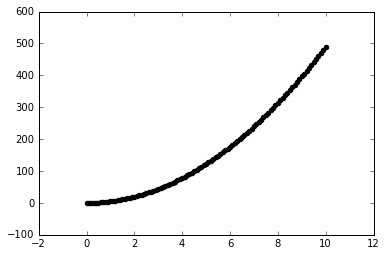

In [85]:
pl.scatter(timeArray, distArray, color = 'k')

#### To plot just a section to see the discrete nature (and add labels):

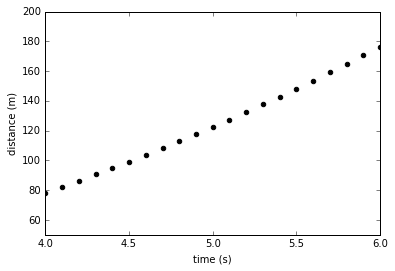

In [86]:
pl.scatter(timeArray, distArray, color = 'k')

pl.xlim(4, 6)
pl.ylim(50, 200)

pl.xlabel('time (s)')
pl.ylabel('distance (m)')

#### Now with the notebook backend:

In [87]:
%matplotlib notebook

<IPython.core.display.Javascript object>


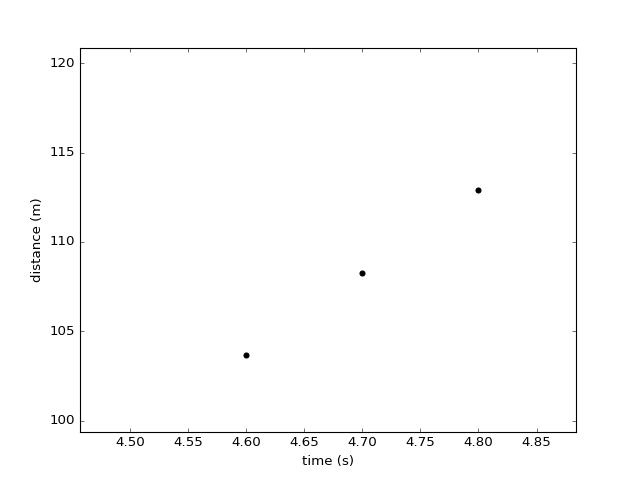

In [88]:
pl.scatter(timeArray, distArray, color = 'k')

pl.xlim(4, 6)
pl.ylim(50, 200)

pl.xlabel('time (s)')
pl.ylabel('distance (m)')

In [89]:
%matplotlib inline

#### To plot distArray vs. timeArray with a blue solid line: 

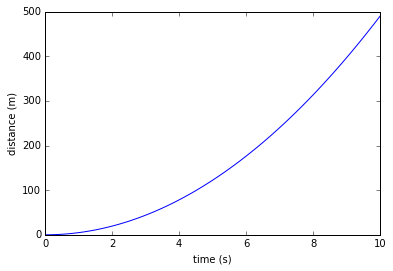

In [94]:
pl.plot(timeArray, distArray, color='b', ls='-')
pl.xlabel('time (s)')           # xlabel is the abscissa
pl.ylabel('distance (m)')       # ylabel is the ordinate

To save the figure, use savefig('filename') and the .pdf, or .eps, or .png, or ...
extension (which Python interprets for you!):

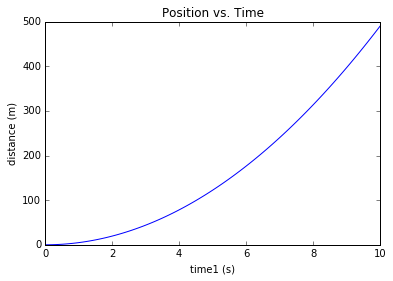

In [96]:
pl.xlabel('time1 (s)')
pl.plot(timeArray, distArray, color='b', ls='-')

pl.ylabel('distance (m)')
pl.title('Position vs. Time')

pl.savefig('position_v_time.pdf')        # In the same cell as pl.plot
pl.savefig('position_v_time.eps')
pl.savefig('position_v_time.png')

#### Q. Where will these files be saved on our computer?

In [98]:
ls position_v_time*

position_v_time.eps  position_v_time.pdf  position_v_time.png


### More array methods

Three topics today:

1. Array slicing vs. copying
2. "Allocating" or "initializing" arrays
3. Boolean logic on arrays 
    

### Making copies of arrays

In [99]:
yArray = np.linspace(0, 5, 6)   # take care of differences of interval determination here!
zArray = yArray[1:4]

print(yArray, zArray)

# Q. What will y and z contain?

[ 0.  1.  2.  3.  4.  5.] [ 1.  2.  3.]


In [100]:
yArray[3] = 10

#### Q. What does the next command yield?

In [101]:
print(yArray, zArray)

[  0.   1.   2.  10.   4.   5.] [  1.   2.  10.]


**zArray is not a copy of yArray, it is a slice of yArray!**

**AND**:
> All arrays generated by basic slicing are always views of the original array.

In other words, the variable zArray is a **reference** to three elements within yArray, elements 1, 2, and 3.

If this is not the desired behavior, copy arrays:

In [102]:
yArray = np.linspace(0, 5, 6)
zArray = yArray.copy()
print(yArray, zArray)

[ 0.  1.  2.  3.  4.  5.] [ 0.  1.  2.  3.  4.  5.]


In [104]:
zArray = yArray.copy()[1:4]   # you only `catch` the slice into new variable, rest of copy NOT
print(yArray, zArray)

[ 0.  1.  2.  3.  4.  5.] [ 1.  2.  3.]


In [105]:
yArray[3] = 10
print(yArray, zArray)

[  0.   1.   2.  10.   4.   5.] [ 1.  2.  3.]


"copy" is an *attribute* of every numpy array, as are "shape", "size", "min", "max", etc.

### Allocating Arrays

If we want an array with the same "shape" as another array, we've seen that we can copy an array with:

In [106]:
xArray = np.array([1, 2, 3])
aArray = xArray.copy()
aArray

array([1, 2, 3])

then fill the array with the appropriate values.

However, we could also use numpy.zeros with the attributes xArray.shape and xArray.dtype:

In [108]:
print(xArray.shape)  # this is a 1D vector
print(xArray.ndim)
xArray

(3,)
1


array([1, 2, 3])

In [109]:
xArray.shape = (3,1)

In [110]:
print(xArray.shape)  # Now it's a 3x1 2D matrix!
print(xArray.ndim)
xArray

(3, 1)
2


array([[1],
       [2],
       [3]])

In [112]:
xArray.shape = (3,)

In [113]:
aArray = np.zeros(xArray.shape, xArray.dtype)
print(aArray.shape)
aArray

(3,)


array([0, 0, 0])

Which gives aArray the same "shape" and data type as xArray.

#### Q. What do I mean by the "shape" of the array?

In [116]:
np.zeros((2,3,4))

array([[[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]])

#### Q. And what is the data type (dtype)?

Alternatively we could do:

In [117]:
aArray = np.zeros_like(xArray)

In [119]:
np.zeros??

In [120]:
bArray = np.ones_like(xArray)

In [121]:
print(aArray, bArray)

[0 0 0] [1 1 1]


### Generalized Indexing

Subarrays can be sliced too, with or without range:

In [123]:
# remember, we already imported numpy (as np)!
xArray = np.linspace(1, 10, 10)  
xArray

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

#### Q. What will xArray contain?

In [124]:
# Note the double brackets indicating a subarray
xArray[[1, 5, 6]] = -1
xArray

array([  1.,  -1.,   3.,   4.,   5.,  -1.,  -1.,   8.,   9.,  10.])

In [125]:
# Using range instead:

xArray = np.linspace(1, 10, 10)
xArray[range(3, 10, 3)] = -1 
xArray

array([ 1.,  2.,  3., -1.,  5.,  6., -1.,  8.,  9., -1.])

#### Q. What will xArray contain?

In [126]:
# Compare
xArray = np.linspace(1, 10, 10)
xArray[[3, 6, 9]] = -1
xArray

array([ 1.,  2.,  3., -1.,  5.,  6., -1.,  8.,  9., -1.])

### Boolean Logic

When do I use that?
* missing or invalid data
* investigating subset of a dataset
* masking/filtering etc.

Complementary methods for dealing with missing or invalid data: numpy masked arrays

    http://docs.scipy.org/doc/numpy/reference/maskedarray.html
    
(masked arrays are a bit harder to use, but offer more powerful features)

For example, return a slice of the array consisting of negative elements only:

In [127]:
xArray

array([ 1.,  2.,  3., -1.,  5.,  6., -1.,  8.,  9., -1.])

In [128]:
myArray = xArray < 0
myArray

array([False, False, False,  True, False, False,  True, False, False,  True], dtype=bool)

In [129]:
xArray[xArray < 0]

array([-1., -1., -1.])

This will replace the elements of a new xArray with values less than zero with the maximum of xArray:

In [130]:
xArray = np.arange(-5, 5)
xArray

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

In [131]:
xArray[xArray < 0] = xArray.max()
xArray

array([4, 4, 4, 4, 4, 0, 1, 2, 3, 4])

### Compound Conditionals & Arrays

numpy has routines for doing boolean logic:

In [132]:
xArray = np.arange(-5, 5)
xArray

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

#### "and"

In [133]:
np.logical_and(xArray > 0, xArray % 2 == 1)

# % is the modulus:  x % 2 == 1 means the remainder of x/2 is 1

# Q. So, what should running this cell give us?

array([False, False, False, False, False, False,  True, False,  True, False], dtype=bool)

#### "or"

In [134]:
np.logical_or(xArray == xArray.min(), xArray == xArray.max())

array([ True, False, False, False, False, False, False, False, False,  True], dtype=bool)

In [135]:
np.logical_not(xArray == xArray.min())

array([False,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [136]:
print(np.any(xArray > 10))
print(np.any(xArray < -2))

False
True


In [137]:
print(np.all(xArray > -10))
print(np.all(xArray > -2))

True
False
